# Sale Forecasting using Time Series (ARIMA) Model

###### In this, we are going to do Time Series use case prediction using ARIMA Model using Monthly Sale Data

In [1]:
#-------------------------------------------------------------------------------------------------------------------
# Author: Pramodkumar Gupta
# Creation Date: 29-Aug-2019
#-------------------------------------------------------------------------------------------------------------------

#Import Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

## Import Dataset

In [2]:
# Import Dataset

salesdata=pd.read_csv('Dataset/ARIMA dataset.csv')

## Data Cleaning

In [3]:
salesdata.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
# Dropping 105 and 106 rows since it contain garbage data
salesdata.drop(106,axis=0,inplace=True)
salesdata.drop(105,axis=0,inplace=True)

In [5]:
salesdata.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
# Rename Columns
salesdata.columns=['Month','Sales Per Month']

In [7]:
salesdata.head()

,Month,Sales Per Month
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [8]:
# Convert Month to datetime
salesdata['Month']=pd.to_datetime(salesdata['Month'])

In [9]:
salesdata.head()

,Month,Sales Per Month
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [10]:
# Setting Month to index to view data graph
salesdata.set_index('Month',inplace=True)

In [11]:
salesdata.head()

,Sales Per Month
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


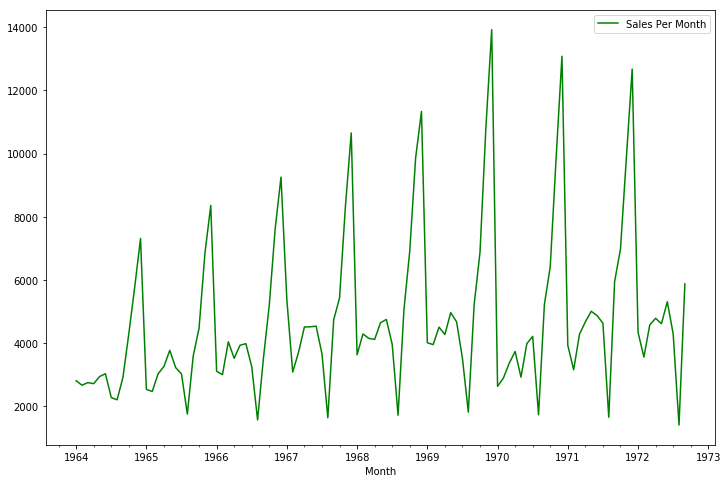

In [12]:
salesdata.plot(color='green',figsize=(12,8))


In [13]:
model=sm.tsa.statespace.SARIMAX(salesdata['Sales Per Month'],order=(1, 0, 0),seasonal_order=(1,1,1,12))
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


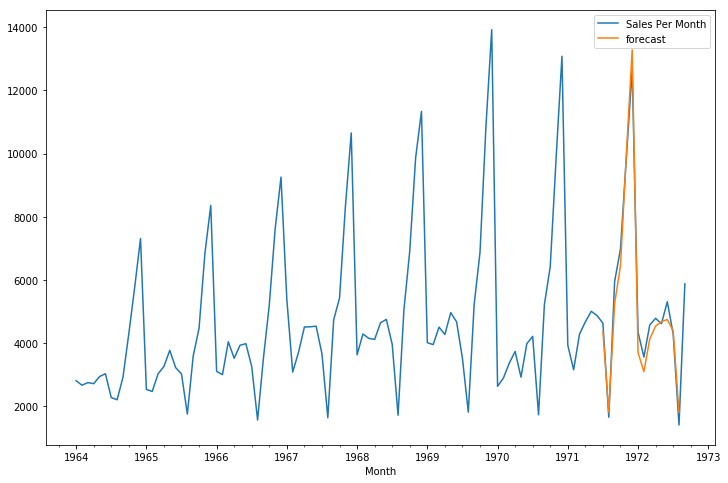

In [14]:
salesdata['forecast']=results.predict(start=90,end=103,dynamic=True)
salesdata[['Sales Per Month','forecast']].plot(figsize=(12,8))

In [15]:
from pandas.tseries.offsets import DateOffset
future_dates=[salesdata.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [16]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=salesdata.columns)

In [17]:
future_datest_df

,Sales Per Month,forecast
1972-10-01,NaN,NaN
1972-11-01,NaN,NaN
1972-12-01,NaN,NaN
1973-01-01,NaN,NaN
1973-02-01,NaN,NaN
1973-03-01,NaN,NaN
1973-04-01,NaN,NaN
1973-05-01,NaN,NaN
1973-06-01,NaN,NaN
1973-07-01,NaN,NaN


In [19]:
future_df=pd.concat([salesdata,future_datest_df])

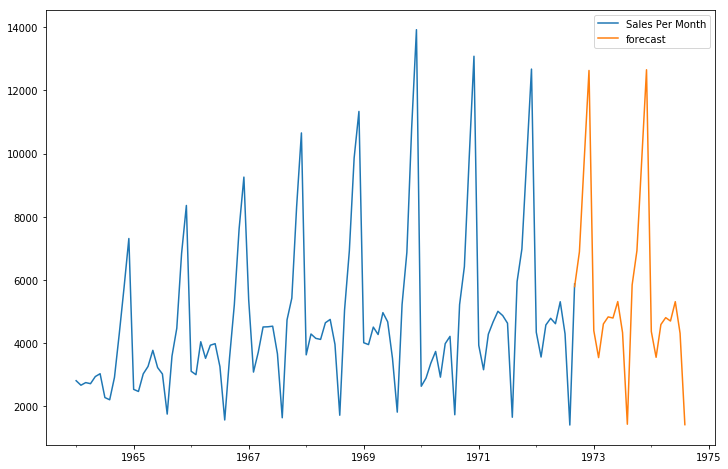

In [23]:
future_df['forecast'] = results.predict(start = 104, end = 130, dynamic= True)  
future_df[['Sales Per Month', 'forecast']].plot(figsize=(12, 8))

##   End of Program